<a href="https://colab.research.google.com/github/Krish6115/MLLab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lab05_A1.py
# ------------------- Import libraries -------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ------------------- Function Definition -------------------
def linear_regression_one_feature(dataframe, feature_col, target_col):
    """
    Trains a linear regression model using a single feature.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the data.
        feature_col (str): The name of the column to be used as the predictor feature.
        target_col (str): The name of the column to be used as the target variable.

    Returns:
        tuple: A tuple containing:
            - The trained LinearRegression model.
            - A tuple with training data (X_train, y_train).
            - A tuple with test data (X_test, y_test).
    """
    # As per the instructions, we consider a numerical attribute as the target.
    # Here, we select one feature (X) and the chosen target (y).
    X = dataframe[[feature_col]]
    y = dataframe[target_col]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # The function returns the model and the data splits for further use
    return model, (X_train, y_train), (X_test, y_test)

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset from the specified path.
    # IMPORTANT: Make sure to change this path to where your CSV file is located.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # --- A1: Train the Linear Regression Model ---
    print("--- A1: Training a Linear Regression Model with a Single Feature ---")

    # We will use 'humidity' to predict the 'temperature'.
    feature = 'humidity'
    target = 'temperature'

    # Call the function to train the model
    trained_model, (X_train_data, y_train_data), (X_test_data, y_test_data) = \
        linear_regression_one_feature(df, feature_col=feature, target_col=target)

    # Print a confirmation message showing the model has been trained.
    # The model object 'trained_model' is now ready for predictions and evaluation in A2.
    print(f"Successfully trained a linear regression model to predict '{target}' using '{feature}'.")
    print(f"Model Intercept: {trained_model.intercept_:.4f}")
    print(f"Model Coefficient for {feature}: {trained_model.coef_[0]:.4f}")



--- A1: Training a Linear Regression Model with a Single Feature ---
Successfully trained a linear regression model to predict 'temperature' using 'humidity'.
Model Intercept: 22.4861
Model Coefficient for humidity: 0.0432


In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------- Function Definitions -------------------

def linear_regression_one_feature(dataframe, feature_col, target_col):
    """
    A1: Trains a linear regression model using a single feature.
    This function is a prerequisite for A2.
    """
    X = dataframe[[feature_col]]
    y = dataframe[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, (X_train, y_train), (X_test, y_test)

def evaluate_regression_performance(y_true, y_pred):
    """
    A2: Calculates MSE, RMSE, MAPE, and R2 scores for a regression model.

    Args:
        y_true (pd.Series): The actual target values.
        y_pred (np.array): The predicted values from the model.

    Returns:
        dict: A dictionary containing the calculated metrics.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # MAPE calculation: Using a small epsilon to avoid division by zero
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "MAPE (%)": mape, "R2 Score": r2}

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # --- A1: Train the model (Prerequisite) ---
    feature = 'humidity'
    target = 'temperature'

    model, (X_train, y_train), (X_test, y_test) = \
        linear_regression_one_feature(df, feature_col=feature, target_col=target)

    # --- A2: Make Predictions and Evaluate ---
    print(f"--- A2: Evaluating Model Performance (Predicting '{target}' from '{feature}') ---")

    # Make predictions on both the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for the training set predictions
    train_metrics = evaluate_regression_performance(y_train, y_train_pred)

    print("\n--- Training Set Metrics ---")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Calculate metrics for the test set predictions
    test_metrics = evaluate_regression_performance(y_test, y_test_pred)

    print("\n--- Test Set Metrics ---")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")


--- A2: Evaluating Model Performance (Predicting 'temperature' from 'humidity') ---

--- Training Set Metrics ---
MSE: 24.9881
RMSE: 4.9988
MAPE (%): 16.1337
R2 Score: 0.0350

--- Test Set Metrics ---
MSE: 22.8324
RMSE: 4.7783
MAPE (%): 14.8345
R2 Score: 0.0698


In [3]:
# lab05_A3.py
# ------------------- Import libraries -------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------- Function Definitions -------------------

def perform_multi_feature_regression(dataframe, target_col, feature_cols):
    """
    A3: Trains a linear regression model using multiple specified features.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target variable column.
        feature_cols (list): A list of column names to use as features.

    Returns:
        tuple: A tuple containing:
            - The trained LinearRegression model.
            - A tuple with training data and predictions (y_train, y_train_pred).
            - A tuple with test data and predictions (y_test, y_test_pred).
    """
    # Select the features (X) and the target (y)
    X = dataframe[feature_cols]
    y = dataframe[target_col]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Generate predictions on both the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Return the model and the true/predicted values for evaluation
    return model, (y_train, y_train_pred), (y_test, y_test_pred)

def evaluate_regression_performance(y_true, y_pred):
    """
    A2 (Prerequisite): Calculates MSE, RMSE, MAPE, and R2 scores.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # Using a small epsilon to avoid division by zero in MAPE calculation
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "MAPE (%)": mape, "R2 Score": r2}

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # --- A3: Train and Evaluate a Multi-Feature Regression Model ---
    print("--- A3: Evaluating Model Performance with Multiple Features ---")

    # Define the target variable
    target = 'temperature'

    # Define the feature variables: all columns except the target and the categorical 'label'
    features = df.drop(columns=['label', target]).columns.tolist()

    print(f"Predicting '{target}' using the following features: {features}")

    # Train the model and get predictions
    model, (y_train, y_train_pred), (y_test, y_test_pred) = \
        perform_multi_feature_regression(df, target_col=target, feature_cols=features)

    # Calculate metrics for the training set
    train_metrics = evaluate_regression_performance(y_train, y_train_pred)

    print("\n--- Training Set Metrics ---")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Calculate metrics for the test set
    test_metrics = evaluate_regression_performance(y_test, y_test_pred)

    print("\n--- Test Set Metrics ---")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")



--- A3: Evaluating Model Performance with Multiple Features ---
Predicting 'temperature' using the following features: ['N', 'P', 'K', 'humidity', 'ph', 'rainfall']

--- Training Set Metrics ---
MSE: 23.5328
RMSE: 4.8511
MAPE (%): 14.8818
R2 Score: 0.0912

--- Test Set Metrics ---
MSE: 21.2559
RMSE: 4.6104
MAPE (%): 13.3842
R2 Score: 0.1341


In [4]:
# lab05_A4.py
# ------------------- Import libraries -------------------
import pandas as pd
from sklearn.cluster import KMeans
import warnings

# Suppress the FutureWarning from scikit-learn regarding n_init
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.cluster._kmeans')

# ------------------- Function Definition -------------------

def perform_kmeans_clustering(dataframe, n_clusters):
    """
    A4: Performs K-Means clustering on the given data for a specified number of clusters.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing only numerical features for clustering.
        n_clusters (int): The number of clusters (k) to form.

    Returns:
        KMeans: The fitted KMeans model object from scikit-learn.
    """
    # Initialize the KMeans model.
    # n_init='auto' is used to set the number of initializations automatically,
    # which is the default and recommended setting to avoid a future warning.
    # random_state is set for reproducibility of results.
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

    # Fit the model to the data
    kmeans_model.fit(dataframe)

    return kmeans_model

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # --- A4: Perform K-Means Clustering ---
    print("--- A4: Performing K-Means Clustering with k=2 ---")

    # For clustering, we remove the non-numeric target variable 'label'.
    X_cluster = df.drop('label', axis=1)

    # Set the number of clusters to 2, as suggested in the lab manual's sample code.
    k = 2

    # Call the function to perform clustering
    kmeans_model_k2 = perform_kmeans_clustering(X_cluster, n_clusters=k)

    # Extract the cluster labels and the coordinates of the cluster centers
    labels = kmeans_model_k2.labels_
    centers = kmeans_model_k2.cluster_centers_

    # Print the results
    print(f"\nSuccessfully performed K-Means clustering with k={k}.")
    print(f"The first 20 cluster labels assigned to the data points are:")
    print(labels[:20])

    print(f"\nThe coordinates of the {k} cluster centers are:")
    print(centers)



--- A4: Performing K-Means Clustering with k=2 ---

Successfully performed K-Means clustering with k=2.
The first 20 cluster labels assigned to the data points are:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

The coordinates of the 2 cluster centers are:
[[ 47.62222222  56.82942943  52.66066066  25.41037928  70.57841244
    6.49298354  77.60380886]
 [ 59.66915888  42.57383178  34.10841121  26.25692518  74.29319171
    6.39633374 183.9433648 ]]


In [5]:
# lab05_A5.py
# ------------------- Import libraries -------------------
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

# Suppress the FutureWarning from scikit-learn regarding n_init
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.cluster._kmeans')

# ------------------- Function Definitions -------------------

def perform_kmeans_clustering(dataframe, n_clusters):
    """
    A4 (Prerequisite): Performs K-Means clustering on the given data.
    """
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_model.fit(dataframe)
    return kmeans_model

def calculate_clustering_scores(dataframe, labels):
    """
    A5: Calculates various scores to evaluate clustering performance.

    Args:
        dataframe (pd.DataFrame): The feature data used for clustering.
        labels (np.array): The labels assigned by the clustering algorithm.

    Returns:
        dict: A dictionary containing the Silhouette, Calinski-Harabasz,
              and Davies-Bouldin scores.
    """
    # Silhouette Score: Measures how similar an object is to its own cluster
    # compared to other clusters. Ranges from -1 to 1. Higher is better.
    sil_score = silhouette_score(dataframe, labels)

    # Calinski-Harabasz Score: The ratio of between-cluster dispersion to
    # within-cluster dispersion. Higher is better.
    ch_score = calinski_harabasz_score(dataframe, labels)

    # Davies-Bouldin Index: The average similarity between each cluster and its
    # most similar one. Lower is better (closer to 0).
    db_score = davies_bouldin_score(dataframe, labels)

    return {
        "Silhouette Score": sil_score,
        "Calinski-Harabasz Score": ch_score,
        "Davies-Bouldin Index": db_score
    }

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # Prepare data for clustering by removing the categorical label
    X_cluster = df.drop('label', axis=1)

    # --- A4: Perform K-Means Clustering (Prerequisite) ---
    # We need the labels from the k=2 clustering to evaluate it.
    k = 2
    kmeans_model_k2 = perform_kmeans_clustering(X_cluster, n_clusters=k)
    labels_k2 = kmeans_model_k2.labels_

    # --- A5: Calculate and Print Clustering Scores ---
    print(f"--- A5: Calculating Evaluation Scores for K-Means Clustering (k={k}) ---")

    # Call the function to get the evaluation scores
    cluster_scores = calculate_clustering_scores(X_cluster, labels_k2)

    # Print the calculated scores
    print("\nClustering Performance Metrics:")
    for score_name, value in cluster_scores.items():
        print(f"{score_name}: {value:.4f}")



--- A5: Calculating Evaluation Scores for K-Means Clustering (k=2) ---

Clustering Performance Metrics:
Silhouette Score: 0.2952
Calinski-Harabasz Score: 766.2574
Davies-Bouldin Index: 1.1922



--- A6: Evaluating Clustering Performance for a Range of k Values ---
Testing k values from 2 to 10...
  Calculated scores for k=2
  Calculated scores for k=3
  Calculated scores for k=4
  Calculated scores for k=5
  Calculated scores for k=6
  Calculated scores for k=7
  Calculated scores for k=8
  Calculated scores for k=9
  Calculated scores for k=10

--- Summary of Clustering Scores ---
 Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Index  k
         0.295218               766.257360              1.192226  2
         0.421373              1686.254322              0.824666  3
         0.400786              1849.114839              0.914932  4
         0.382822              1789.088676              0.991386  5
         0.356825              1535.977176              1.098548  6
         0.376154              1572.755800              1.019149  7
         0.465052              1847.295745              0.765719  8
         0.457506              1897.069956              0.841

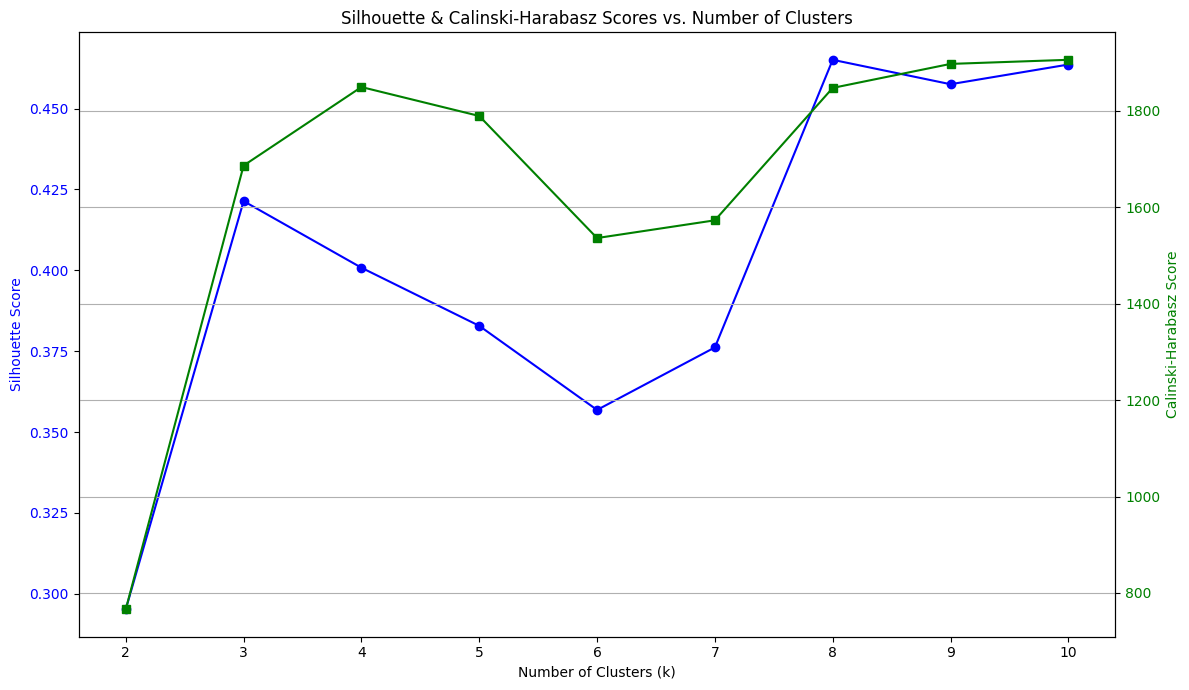

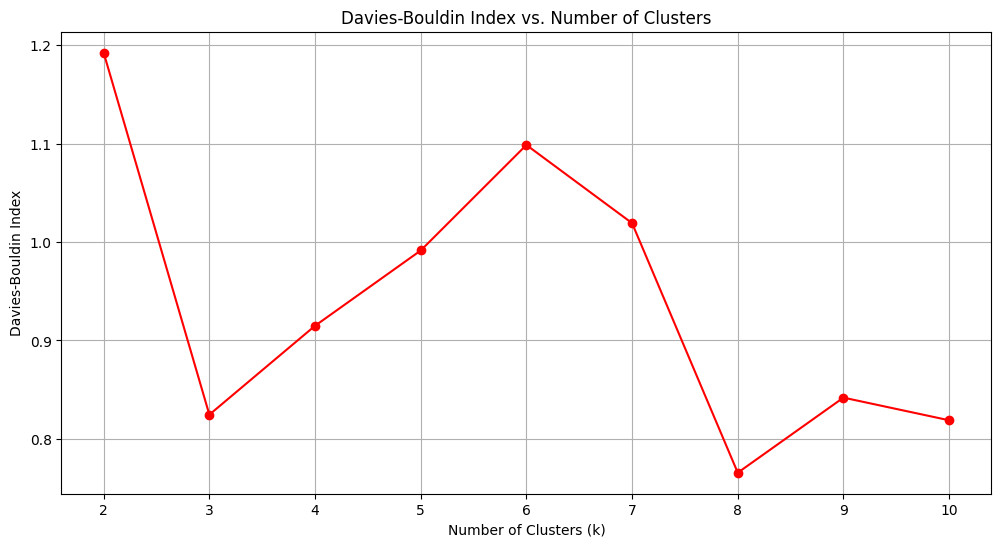

In [6]:
# lab05_A6.py
# ------------------- Import libraries -------------------
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import warnings

# Suppress the FutureWarning from scikit-learn regarding n_init
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.cluster._kmeans')

# ------------------- Function Definitions -------------------

def perform_kmeans_clustering(dataframe, n_clusters):
    """
    A4 (Prerequisite): Performs K-Means clustering on the given data.
    """
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_model.fit(dataframe)
    return kmeans_model

def calculate_clustering_scores(dataframe, labels):
    """
    A5 (Prerequisite): Calculates various scores to evaluate clustering performance.
    """
    sil_score = silhouette_score(dataframe, labels)
    ch_score = calinski_harabasz_score(dataframe, labels)
    db_score = davies_bouldin_score(dataframe, labels)
    return {
        "Silhouette Score": sil_score,
        "Calinski-Harabasz Score": ch_score,
        "Davies-Bouldin Index": db_score
    }

def find_optimal_k_with_scores(dataframe, k_range):
    """
    A6: Performs clustering for a range of k values and collects evaluation scores.

    Args:
        dataframe (pd.DataFrame): The feature data for clustering.
        k_range (range): A range of k values to test (e.g., range(2, 11)).

    Returns:
        list: A list of dictionaries, where each dictionary contains the k value
              and its corresponding clustering evaluation scores.
    """
    all_scores = []
    print(f"Testing k values from {k_range.start} to {k_range.stop - 1}...")
    for k in k_range:
        # Perform clustering for the current k
        kmeans_model = perform_kmeans_clustering(dataframe, n_clusters=k)
        labels = kmeans_model.labels_

        # Calculate the scores for the current clustering result
        scores = calculate_clustering_scores(dataframe, labels)
        scores['k'] = k  # Add the k value to the dictionary
        all_scores.append(scores)
        print(f"  Calculated scores for k={k}")

    return all_scores

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # Prepare data for clustering by removing the categorical label
    X_cluster = df.drop('label', axis=1)

    # --- A6: Evaluate Clustering for a Range of k Values ---
    print("\n--- A6: Evaluating Clustering Performance for a Range of k Values ---")

    # Define the range of k to test, as suggested in the lab manual
    k_values_to_test = range(2, 11)

    # Get the list of scores for each k
    clustering_results = find_optimal_k_with_scores(X_cluster, k_values_to_test)

    # Convert the list of dictionaries to a DataFrame for easier viewing and plotting
    scores_df = pd.DataFrame(clustering_results)

    print("\n--- Summary of Clustering Scores ---")
    # Use to_string() to ensure the full DataFrame is printed
    print(scores_df.to_string(index=False))

    # --- Plotting the results for visual analysis ---
    print("\nGenerating plots to determine the optimal cluster count...")

    # Plot for Silhouette and Calinski-Harabasz Scores (higher is better)
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Silhouette Score', color='blue')
    ax1.plot(scores_df['k'], scores_df['Silhouette Score'], marker='o', color='blue', label='Silhouette Score')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
    ax2.set_ylabel('Calinski-Harabasz Score', color='green')
    ax2.plot(scores_df['k'], scores_df['Calinski-Harabasz Score'], marker='s', color='green', label='CH Score')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Silhouette & Calinski-Harabasz Scores vs. Number of Clusters')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

    # Plot for Davies-Bouldin Index (lower is better)
    plt.figure(figsize=(12, 6))
    plt.plot(scores_df['k'], scores_df['Davies-Bouldin Index'], marker='o', color='red')
    plt.title('Davies-Bouldin Index vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.grid(True)
    plt.show()




--- A7: Generating Elbow Plot to Determine Optimal k ---
Calculating inertia for k values from 2 to 19...
  Inertia for k=2: 13955198.93
  Inertia for k=3: 7423978.87
  Inertia for k=4: 5337369.95
  Inertia for k=5: 4417571.09
  Inertia for k=6: 4181884.87
  Inertia for k=7: 3548949.68
  Inertia for k=8: 2727872.92
  Inertia for k=9: 2374253.74
  Inertia for k=10: 2131118.84
  Inertia for k=11: 1950214.89
  Inertia for k=12: 1830084.39
  Inertia for k=13: 1731477.80
  Inertia for k=14: 1585172.12
  Inertia for k=15: 1477965.05
  Inertia for k=16: 1327102.29
  Inertia for k=17: 1265056.62
  Inertia for k=18: 1219095.99
  Inertia for k=19: 1168157.71

Plotting the elbow curve...


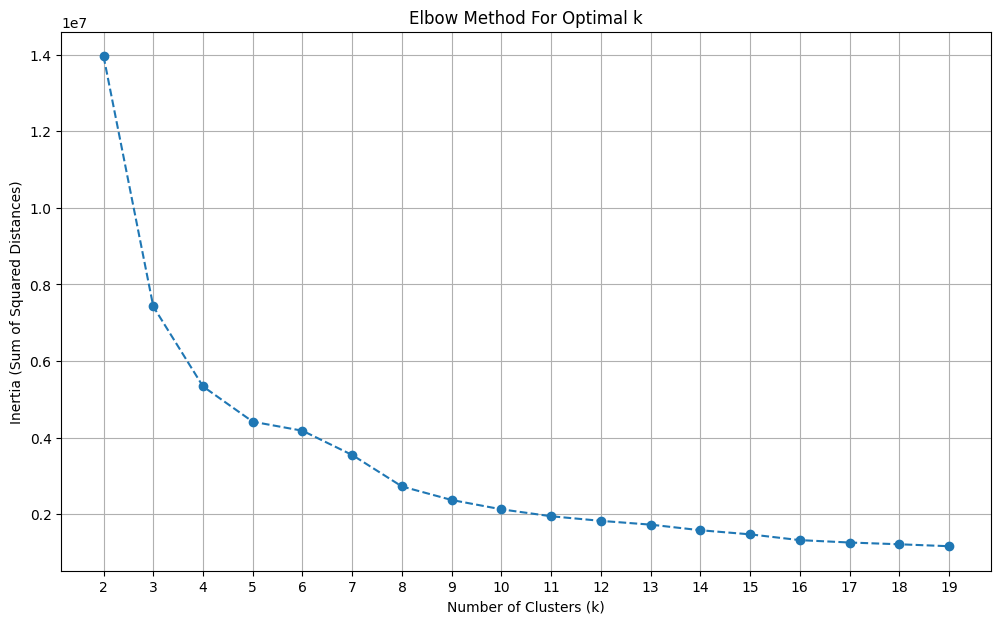

Elbow plot generation complete.


In [7]:
# lab05_A7.py
# ------------------- Import libraries -------------------
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

# Suppress the FutureWarning from scikit-learn regarding n_init
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.cluster._kmeans')

# ------------------- Function Definitions -------------------

def perform_kmeans_clustering(dataframe, n_clusters):
    """
    A4 (Prerequisite): Performs K-Means clustering on the given data.
    """
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_model.fit(dataframe)
    return kmeans_model

def calculate_inertia_for_elbow(dataframe, k_range):
    """
    A7: Calculates the inertia (sum of squared distances to the closest centroid)
    for a range of k values.

    Args:
        dataframe (pd.DataFrame): The feature data for clustering.
        k_range (range): A range of k values to test.

    Returns:
        list: A list of inertia values corresponding to each k in the k_range.
    """
    # This list will hold the inertia values for each k
    distortions = []
    print(f"Calculating inertia for k values from {k_range.start} to {k_range.stop - 1}...")

    for k in k_range:
        # Perform clustering for the current k value
        kmeans_model = perform_kmeans_clustering(dataframe, n_clusters=k)

        # The 'inertia_' attribute holds the sum of squared distances
        distortions.append(kmeans_model.inertia_)
        print(f"  Inertia for k={k}: {kmeans_model.inertia_:.2f}")

    return distortions

# ------------------- MAIN PROGRAM EXECUTION -------------------
if __name__ == "__main__":
    # Load the dataset.
    # IMPORTANT: Update this path to your local file location.
    try:
        df = pd.read_csv('Crop_recommendation.csv')
    except FileNotFoundError:
        print("Error: 'Crop_recommendation.csv' not found.")
        print("Please update the file path in the script before running.")
        exit()

    # Prepare data for clustering by removing the categorical 'label' column
    X_cluster = df.drop('label', axis=1)

    # --- A7: Determine Optimal k using the Elbow Plot ---
    print("\n--- A7: Generating Elbow Plot to Determine Optimal k ---")

    # Define the range of k to test, as specified in the lab manual
    k_values_to_test = range(2, 20)

    # Calculate the inertia for each k in the range
    inertia_values = calculate_inertia_for_elbow(X_cluster, k_values_to_test)

    # --- Plotting the Elbow Curve ---
    print("\nPlotting the elbow curve...")
    plt.figure(figsize=(12, 7))
    plt.plot(k_values_to_test, inertia_values, marker='o', linestyle='--')

    # Adding titles and labels for clarity
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.xticks(k_values_to_test) # Ensure all k-values are shown as ticks
    plt.grid(True)

    # Display the plot
    plt.show()
    print("Elbow plot generation complete.")

